## 1. Data Preprocessing

In [1]:
#importing required libraries
import pandas as pd
import missingno as msno 
import numpy as np
import imblearn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn import metrics 
from sklearn.metrics import roc_curve

In [2]:
#read the data
data= pd.read_csv("D:/7150CEM/Data/FinalData/FifthYear.csv")
#Dropping target feature
data1 = data.drop('class',axis=1)
y = data['class']
#data visualization
data1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,33401.0000,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,2789.6000,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,1.2437,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622


In [3]:
#looking for null values
data1.isnull().sum()


Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr60    268
Attr61     15
Attr62      0
Attr63     21
Attr64    107
Length: 64, dtype: int64

<Axes: >

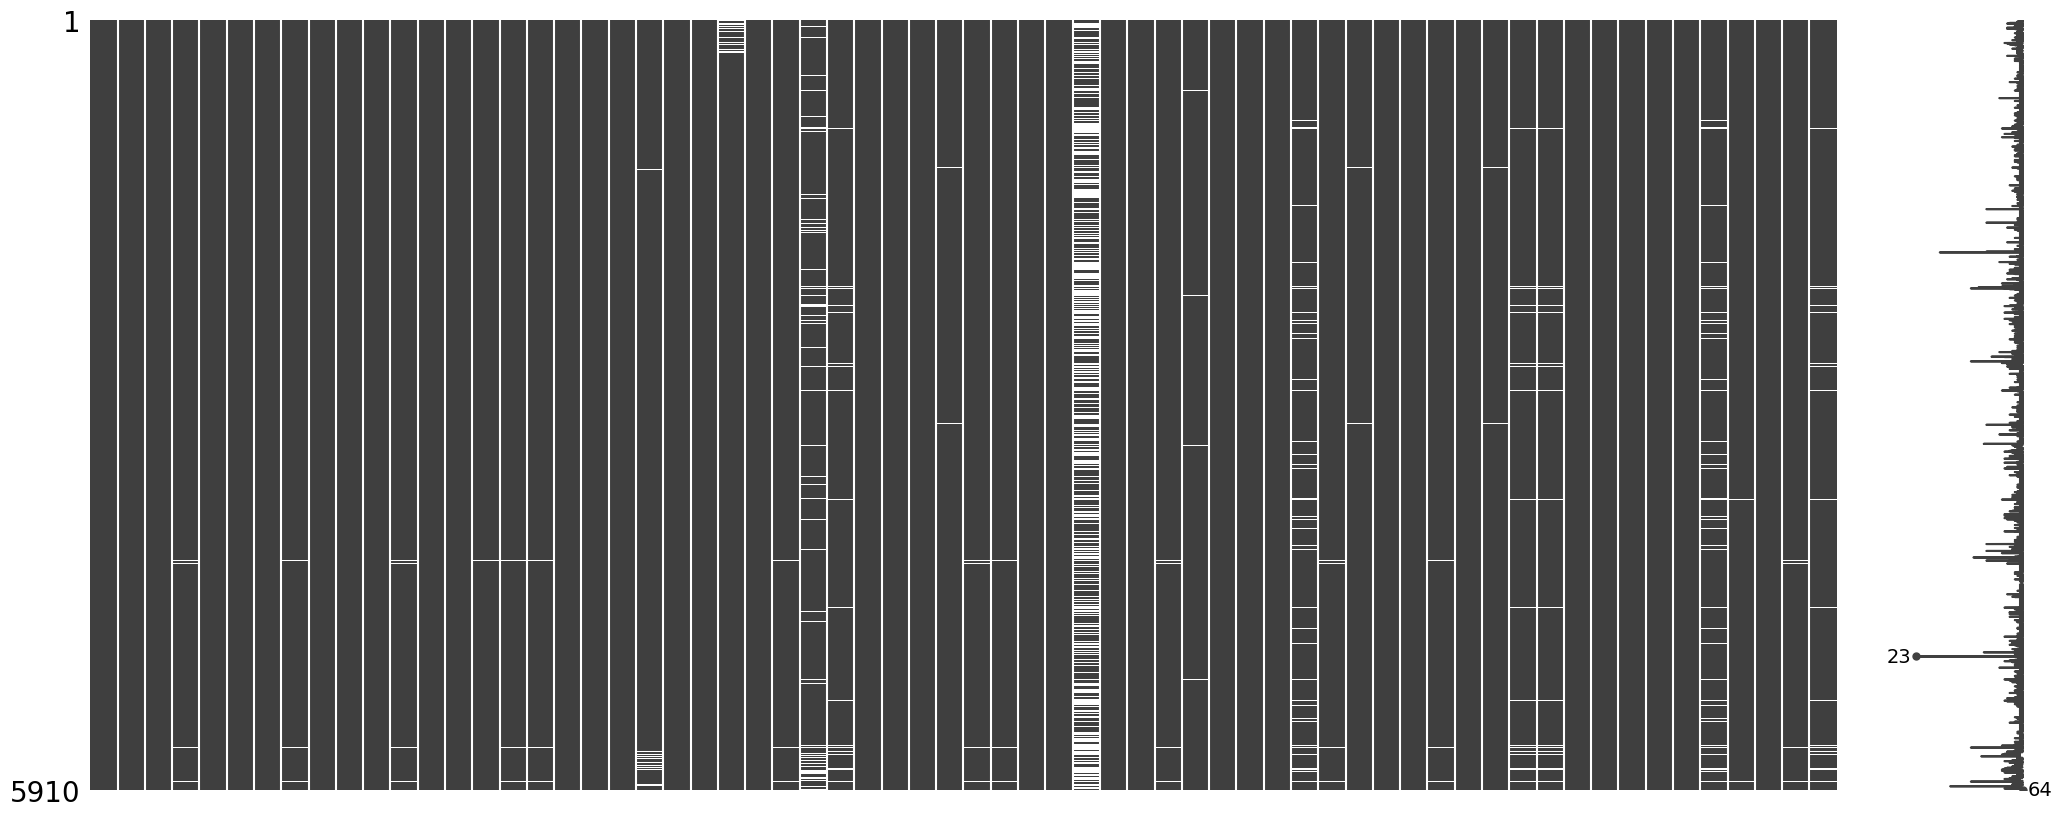

In [4]:
#Matrix for the Missing values
msno.matrix(data1)

In [5]:
#drop the null values
data_1st=data1.dropna()

In [6]:
#calculate data loss percentage
per_1st = ((len(data1)-len(data_1st))/len(data1))*100
print("percentage of data loss after removing the null values: ", per_1st)

percentage of data loss after removing the null values:  48.71404399323181


# 2. Data Imputation

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
data1 = pd.DataFrame(imputer.fit_transform(data1), columns=data1.columns)

In [8]:
#rename column values and exporting the dataset
data1.columns=['ROA', 'TDTA', 'WCTA','CAAL','DIR','REL','EBIT','BV','ATR','ETA','GPEIFE','GPL','GPDS','GPI','LGPD','GPDL','TATL','GPA','Revenue','ITS','NS','OCFTA','NPS','GPA_3','ESTA','SR','POATFE','WCFA','FS','TLCS','GPIS','CLTCOGS','OPSL','OPTL','PSTA','ATR','CAIL','CCTA','PSS','CAIRSL','TLOAD','POAS','RRIT','RS','PI','CAISL','ICOGS','POADTA_EBITDA','POADS_EBITDA','CR','SLTA','SLCOGS','EFAR','CCFA','WC','SCOGSS','CAISL_SGPD','CSR','LLE','SI','STR','SLS','SSL','SFA']
data1.to_csv('D:/7150CEM/Data/FinalData/FirstYear_SI.csv', index=False)

### 3.Data Scaling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into 80-20 ratio
X_train,X_test,y_train,y_test= train_test_split(data1,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.Feature Reduction

### 4.1 Random Forest Regression technique

In [10]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest regression for feature reduction
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [11]:
important_features = model.feature_importances_

# Converting important features into dataframe
data_with_imp_features = pd.DataFrame({
    'features': data1.columns,
    'Importance': important_features
})

# Sort by importance
data_with_imp_features = data_with_imp_features.sort_values(by='Importance', ascending=False)

#selecting top 20 important features
top_features_df = data_with_imp_features.head(20)


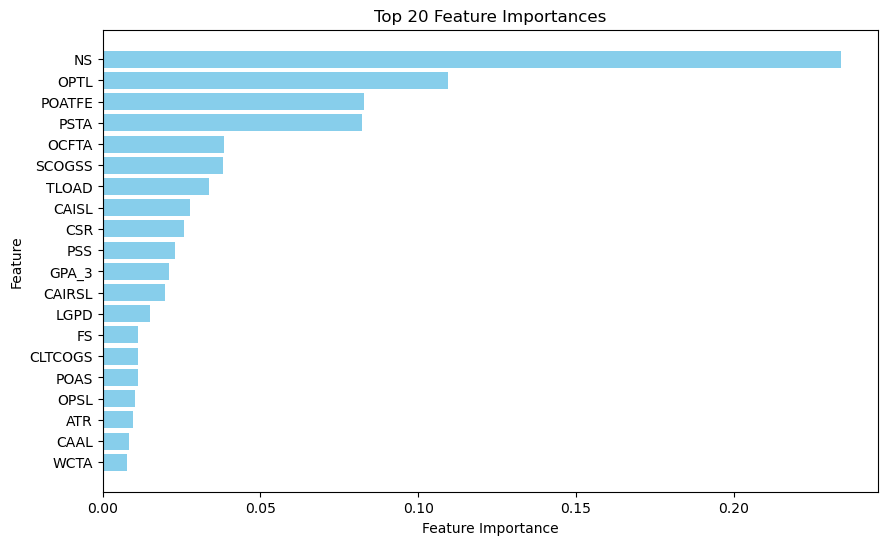

In [12]:
# Plotting the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_features_df['features'], top_features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [13]:
#new dataset with reduced features
data_reduced_features = data1[['NS','OPTL','POATFE','PSTA','SCOGSS','TLOAD','CAISL','CSR','PSS','GPA_3','CAIRSL','LGPD','FS','CLTCOGS','POAS','OPSL','ATR','CAAL','WCTA']]


### 4.2 Data Scaling for reduced features

In [14]:
#Splitting the data into 80-20 ratio
reduced_X_train,reduced_X_test,reduced_y_train,reduced_y_test= train_test_split(data_reduced_features,y,test_size=0.2,random_state = 42)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(reduced_X_train)
# Apply transform to both the training set and the test set.
reduced_X_train = scaler.transform(reduced_X_train)
reduced_X_test = scaler.transform(reduced_X_test)

## 5. Data Balancing

In [15]:
#cheching for data imbalance
# target feature 'class' Count
class_0 = data_reduced_features[data['class'] == 0]
class_1 = data_reduced_features[data['class'] == 1]
#print the shape of the class variable
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (5500, 20)
class 1: (410, 20)


### 5.1 SMOTE oversampling

In [16]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable of new dataset
red_X_train, red_y_train = smote.fit_resample(reduced_X_train,reduced_y_train)
red_X_test, red_y_test = smote.fit_resample(reduced_X_test,reduced_y_test)


## 6. Machine Learning Techniques
### 6.1 Logistic Regression

In [17]:
import sklearn.linear_model as lm 
from sklearn.linear_model import LogisticRegression
#logistic Regression
LR=lm.LogisticRegression() 
LR.fit(red_X_train,red_y_train) 
LR_pred= LR.predict(red_X_test) 
#train and test accuracy scores
trACC_LR=LR.score(red_X_train,red_y_train) 
tesACC_LR=LR.score(red_X_test,red_y_test) 
print('Train Accuracy for Logistic Regression : ',trACC_LR) 
print('Test Accuracy for Logistic Regression : ', tesACC_LR,"\n") #78.89

Train Accuracy for Logistic Regression :  0.7597549909255898
Test Accuracy for Logistic Regression :  0.7889194139194139 



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Confusion matrix
LR_cf = confusion_matrix(red_y_test,LR_pred) 
print('confusion matrix for LR:\n',LR_cf) 
#printingcclassification report of Confusion matrix 
LR_matrix = classification_report(red_y_test,LR_pred) 
print('Classification Report for LR:\n',LR_matrix) 


confusion matrix for LR:
 [[856 236]
 [225 867]]
Classification Report for LR:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      1092
           1       0.79      0.79      0.79      1092

    accuracy                           0.79      2184
   macro avg       0.79      0.79      0.79      2184
weighted avg       0.79      0.79      0.79      2184



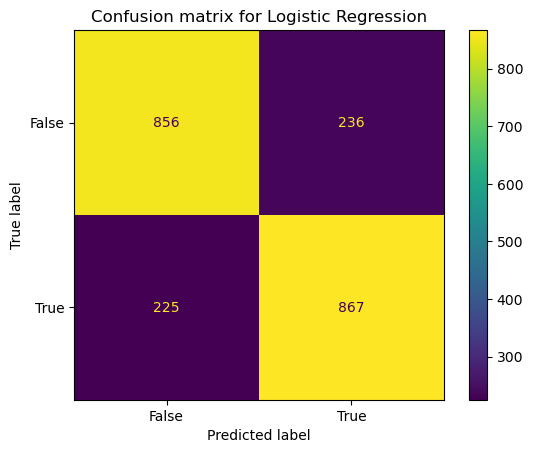

In [19]:
#plotting Confusion matrix  
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cf,display_labels = [False,True]) 
LR_cm_display.plot() 
plt.title('Confusion matrix for Logistic Regression') 
plt.show()

### 6.2 Decision Tree Classification

In [20]:
from sklearn.tree import DecisionTreeClassifier
#Decision tree classifier
DT= DecisionTreeClassifier()
DT.fit(red_X_train, red_y_train) 
DT_pred = DT.predict(red_X_test)
#train and test accuracies
trACC_DT=DT.score(red_X_train,red_y_train) 
tesACC_DT=DT.score(red_X_test,red_y_test) 
print('Train Accuracy for Decision Tree  : ',trACC_DT) 
print('Test Accuracy for Decision Tree : ', tesACC_DT,"\n") #82.78

Train Accuracy for Decision Tree  :  1.0
Test Accuracy for Decision Tree :  0.8278388278388278 



In [21]:
#Confusion Matrix
DT_cf = confusion_matrix(red_y_test,DT_pred) 
print('confusion matrix for DT:\n',DT_cf) 
#Classification report of Confusion matrix 
DT_matrix = classification_report(red_y_test,DT_pred) 
print('Classification Report for DT:\n',DT_matrix) 


confusion matrix for DT:
 [[995  97]
 [279 813]]
Classification Report for DT:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      1092
           1       0.89      0.74      0.81      1092

    accuracy                           0.83      2184
   macro avg       0.84      0.83      0.83      2184
weighted avg       0.84      0.83      0.83      2184



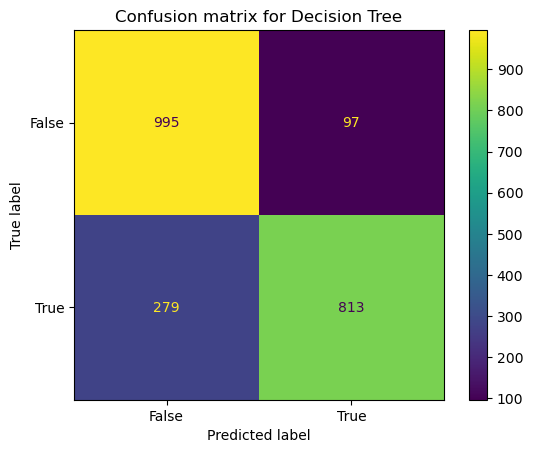

In [22]:
#plotting Confusion matrix  
DT_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_cf,display_labels = [False,True]) 
DT_cm_display.plot() 
plt.title('Confusion matrix for Decision Tree') 
plt.show()

### 6.3 Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
RF= RandomForestClassifier(n_estimators=100)
RF.fit(red_X_train, red_y_train) 
RF_pred = RF.predict(red_X_test)
#train and test accuracies
trACC_RF=RF.score(red_X_train,red_y_train) 
tesACC_RF=RF.score(red_X_test,red_y_test) 
print('Train Accuracy for Random Forest  : ',trACC_RF) 
print('Test Accuracy for Random Forest : ', tesACC_RF,"\n") #87.5


Train Accuracy for Random Forest  :  1.0
Test Accuracy for Random Forest :  0.875 



In [24]:
#Confusion Matrix
RF_cf = confusion_matrix(red_y_test,RF_pred) 
print('confusion matrix for RF:\n',RF_cf) 
#Classification report of confusion matrix 
RF_matrix = classification_report(red_y_test,RF_pred) 
print('Classification Report for RF:\n',RF_matrix) 

confusion matrix for RF:
 [[1040   52]
 [ 221  871]]
Classification Report for RF:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      1092
           1       0.94      0.80      0.86      1092

    accuracy                           0.88      2184
   macro avg       0.88      0.88      0.87      2184
weighted avg       0.88      0.88      0.87      2184



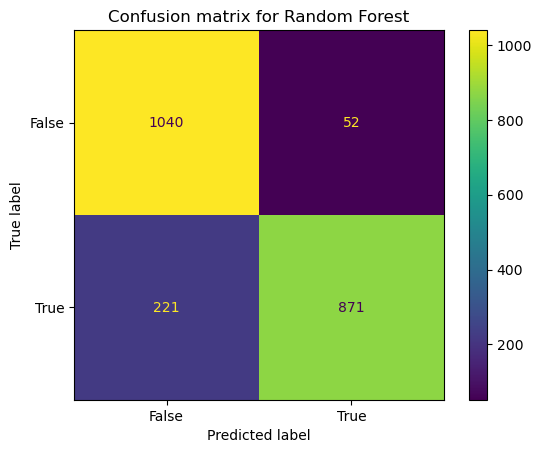

In [25]:
#plotting Confusion matrix  
RF_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_cf,display_labels = [False,True]) 
RF_cm_display.plot() 
plt.title('Confusion matrix for Random Forest') 
plt.show()

### 6.4 Gradient Boosting Classification

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
GB.fit(red_X_train, red_y_train)
GB_pred = GB.predict(red_X_test)
#train and test accuracies
trACC_GB=GB.score(red_X_train,red_y_train) 
tesACC_GB=GB.score(red_X_test,red_y_test) 
print('Train Accuracy for Gradient Boost  : ',trACC_GB) 
print('Test Accuracy for Gradient Boost : ', tesACC_GB,"\n") #87.63

Train Accuracy for Gradient Boost  :  1.0
Test Accuracy for Gradient Boost :  0.8763736263736264 



In [27]:
#Confusion Matrix
GB_cf = confusion_matrix(red_y_test,GB_pred) 
print('confusion matrix for GB:\n',GB_cf) 
#Classification report of Confusion matrix
GB_matrix = classification_report(red_y_test,GB_pred) 
print('Classification Report for GB:\n',GB_matrix) 


confusion matrix for GB:
 [[1046   46]
 [ 224  868]]
Classification Report for GB:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      1092
           1       0.95      0.79      0.87      1092

    accuracy                           0.88      2184
   macro avg       0.89      0.88      0.88      2184
weighted avg       0.89      0.88      0.88      2184



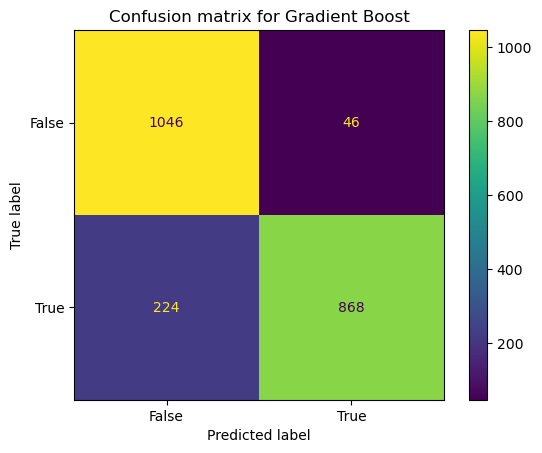

In [28]:
#plotting Confusion matrix  
GB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = GB_cf,display_labels = [False,True]) 
GB_cm_display.plot() 
plt.title('Confusion matrix for Gradient Boost') 
plt.show()

### 6.5 Extreme Gradient Boosting Classification (XGBoosting)

In [29]:
import xgboost as xgb
# Train a XGB model using the scikit-learn API
XGB = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=10, enable_categorical=True)
XGB.fit(red_X_train, red_y_train)
XGB_pred = XGB.predict(red_X_test)
#train and test Accuracies
trACC_XGB=XGB.score(red_X_train,red_y_train) 
tesACC_XGB=XGB.score(red_X_test,red_y_test) 
print('Train Accuracy for Xtreme Gradient Boost  : ',trACC_XGB) 
print('Test Accuracy for Xtreme Gradient Boost : ', tesACC_XGB,"\n") #88.59


Train Accuracy for Xtreme Gradient Boost  :  0.9998865698729582
Test Accuracy for Xtreme Gradient Boost :  0.885989010989011 



In [30]:
#Confusion Matrix
XGB_cf = confusion_matrix(red_y_test,XGB_pred) 
print('confusion matrix for XGB:\n',XGB_cf) 
#Classification report of Confusion matrix 
XGB_matrix = classification_report(red_y_test,XGB_pred) 
print('Classification Report for XGB:\n',XGB_matrix) 


confusion matrix for XGB:
 [[1045   47]
 [ 202  890]]
Classification Report for XGB:
               precision    recall  f1-score   support

           0       0.84      0.96      0.89      1092
           1       0.95      0.82      0.88      1092

    accuracy                           0.89      2184
   macro avg       0.89      0.89      0.89      2184
weighted avg       0.89      0.89      0.89      2184



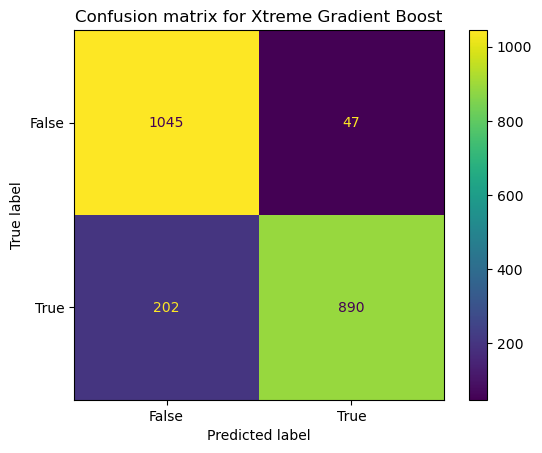

In [31]:
#plotting Confusion matrix  
XGB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = XGB_cf,display_labels = [False,True]) 
XGB_cm_display.plot() 
plt.title('Confusion matrix for Xtreme Gradient Boost') 
plt.show()

### 6.6 Support Vector Machine (SVM) Classification

In [32]:
from sklearn.svm import SVC
#Support Vector Machine
svc = SVC(probability=True)
svc.fit(red_X_train,red_y_train)
svc_pred = svc.predict(red_X_test)
#train and test Accuracies
trACC_svc=svc.score(red_X_train,red_y_train) 
tesACC_svc=svc.score(red_X_test,red_y_test) 
print('Train Accuracy for SVM  : ',trACC_svc) 
print('Test Accuracy for SVM : ', tesACC_svc,"\n") #81.86

Train Accuracy for SVM  :  0.7688294010889292
Test Accuracy for SVM :  0.8186813186813187 



In [33]:
#Confusion Matrix
svc_cf = confusion_matrix(red_y_test,svc_pred) 
print('confusion matrix for SVM:\n',svc_cf)
#Classification report of Confusion matrix metrics 
svc_matrix = classification_report(red_y_test,svc_pred) 
print('Classification Report for SVM:\n',svc_matrix) 


confusion matrix for SVM:
 [[871 221]
 [175 917]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1092
           1       0.81      0.84      0.82      1092

    accuracy                           0.82      2184
   macro avg       0.82      0.82      0.82      2184
weighted avg       0.82      0.82      0.82      2184



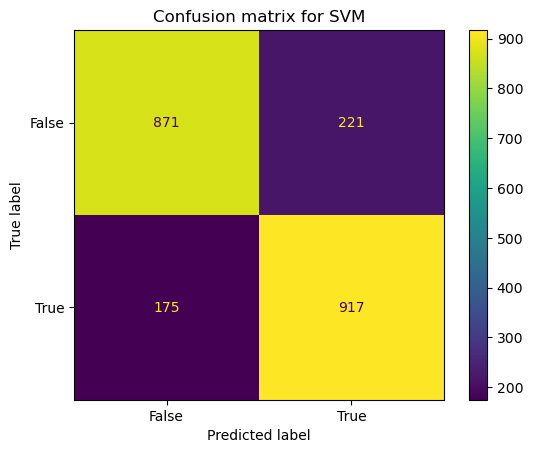

In [34]:
#plotting Confusion matrix  
svc_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svc_cf,display_labels = [False,True]) 
svc_cm_display.plot() 
plt.title('Confusion matrix for SVM') 
plt.show()

## 7. ROC Curve

In [35]:
# ROC curve for Decision Tree 
DT_pred_prob = DT.predict_proba(red_X_test) 
DT_pred_prob = DT_pred_prob[:,1] 
DT_fpr,DT_tpr,_=roc_curve(red_y_test,DT_pred_prob) 

# ROC for Logistic regression 
LR_pred_prob = LR.predict_proba(red_X_test) 
LR_pred_prob = LR_pred_prob[:,1] 
LR_fpr,LR_tpr,_=roc_curve(red_y_test,LR_pred_prob) 

#ROC for Random Forest
RF_pred_prob = RF.predict_proba(red_X_test)
RF_pred_prob = RF_pred_prob[:,1]
RF_fpr,RF_tpr,_=roc_curve(red_y_test,RF_pred_prob)

#ROC curve for GB
GB_pred_prob = GB.predict_proba(red_X_test)
GB_pred_prob = GB_pred_prob[:,1]
GB_fpr,GB_tpr,_=roc_curve(red_y_test,GB_pred_prob)

#ROC curve for XGB
XGB_pred_prob = XGB.predict_proba(red_X_test)
XGB_pred_prob = XGB_pred_prob[:,1]
XGB_fpr,XGB_tpr,_=roc_curve(red_y_test,XGB_pred_prob)

#ROC curve for SVC
svc_pred_prob = svc.predict_proba(red_X_test)
svc_pred_prob = svc_pred_prob[:,1]
svc_fpr,svc_tpr,_=roc_curve(red_y_test,svc_pred_prob)

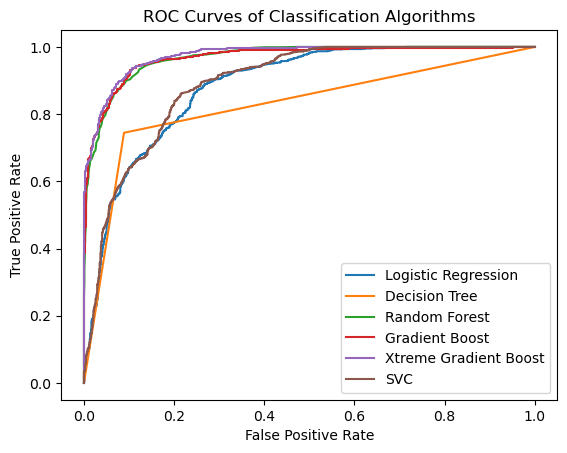

In [36]:
#plotting Roc_curve 
plt.figure() 
plt.plot(LR_fpr,LR_tpr,label = 'Logistic Regression') 
plt.plot(DT_fpr,DT_tpr,label = 'Decision Tree') 
plt.plot(RF_fpr,RF_tpr,label = 'Random Forest')
plt.plot(GB_fpr,GB_tpr,label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr,label = 'Xtreme Gradient Boost')
plt.plot(svc_fpr,svc_tpr,label='SVC')
plt.title('ROC Curves of Classification Algorithms') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend() 
plt.show()

## 8. Accuracies of Machine Learning Algorithms

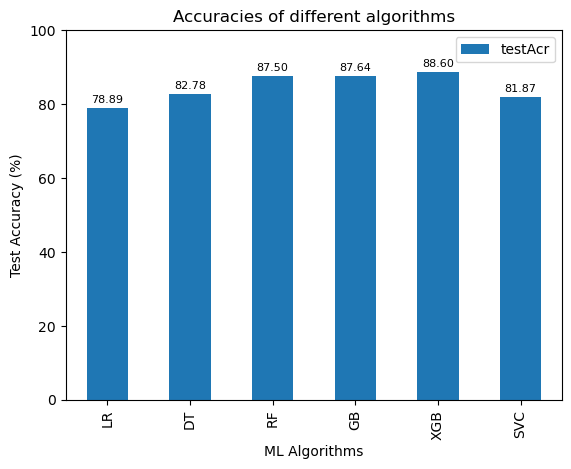

In [37]:
#Accuracy plot of Different Machine Learning methods 
dt = [['LR',trACC_LR*100,tesACC_LR*100],['DT',trACC_DT*100,tesACC_DT*100],['RF',trACC_RF*100,tesACC_RF*100],['GB',trACC_GB*100,tesACC_GB*100],['XGB',trACC_XGB*100,tesACC_XGB*100],['SVC',trACC_svc*100,tesACC_svc*100]] 
df = pd.DataFrame(dt, columns=['Name','trainAcr','testAcr']) 
plots = df.plot.bar(x='Name',y = 'testAcr',width = 0.5) 
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
plt.title('Accuracies of different algorithms') 
plt.xlabel('ML Algorithms') 
plt.ylabel('Test Accuracy (%)') 
plt.ylim(0,100)
plt.show()